# Data importation

In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [42]:
train = pd.read_csv('data/KDDTrain+.txt')
test = pd.read_csv('data/KDDtest+.txt')
train.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


# Preprocessing

## 1\ Remove last column 

In [43]:
train = train.iloc[:,0:42]
test = test.iloc[:,0:42]

train.head(10)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


## 2\  Add features name

In [44]:
train.columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
8,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune
9,0,tcp,private,REJ,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [45]:
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                    ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                     'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                  'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd
7,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan


## 3\ 1-N Encoding

In [46]:
print('Training set:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [47]:
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)

In [48]:
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'aol':0,'auth':1,'bgp':2,'courier':3,'csnet_ns':4,'ctf':5,'daytime':6,'discard':7,'domain':8,
    'domain_u':9,'echo':10,'eco_i':11,'ecr_i':12, 'efs':13,'exec':14,'finger':15,'ftp':16,'ftp_data':17,'gopher':18,'harvest':19,
    'hostnames':20,'http':21,'http_2784':22,'http_443':23,'http_8001':24,'imap4':25,'IRC':26, 'iso_tsap':27,'klogin':28,'kshell':29,
    'ldap':30,'link':31,'login':32,'mtp':33,'name':34,'netbios_dgm':35,'netbios_ns':36,'netbios_ssn':37,'netstat':38,'nnsp':39,
    'nntp':40,'ntp_u':41,'other':42,'pm_dump':43,'pop_2':44,'pop_3':45,'printer':46,'private':47,'red_i':48,'remote_job':49,
    'rje':50,'shell':51,'smtp':52,'sql_net':53,'ssh':54,'sunrpc':55,'supdup':56,'systat':57,'telnet':58,'tftp_u':59,'tim_i':60,
    'time':61,'urh_i':62,'urp_i':63,'uucp':64,'uucp_path':65,'vmnet':66,'whois':67,'X11':68,'Z39_50':69},inplace = True)

In [49]:
train['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)
test['label'].replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1,
                        'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 0,'nmap' : 0,'portsweep' : 0,
                        'satan' : 0,'mscan' : 0,'saint' : 0,'ftp_write': 0,'guess_passwd': 0,'imap': 0,'multihop': 0,'phf': 0,
                        'spy': 0,'warezclient': 0,'warezmaster': 0,'sendmail': 0,'named': 0,'snmpgetattack': 0,'snmpguess': 0,
                         'xlock': 0,'xsnoop': 0,'httptunnel': 0,'buffer_overflow': 0,'loadmodule': 0,'perl': 0,'rootkit': 0,
                         'ps': 0,'sqlattack': 0,'xterm': 0},inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,42,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,47,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,21,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,21,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,47,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,47,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,47,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,49,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,47,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,47,1,0,0,0,0,0,0,...,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


## 4\ Data balancing

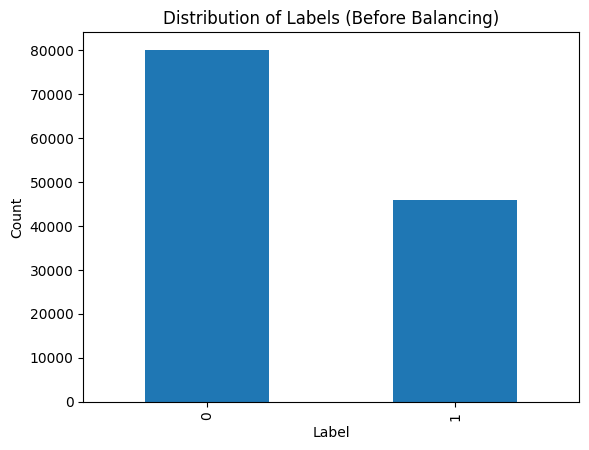

In [50]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

## 5\ Normalisation

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
train=pd.DataFrame(scaler.fit_transform(train),
            columns=train.columns, index=train.index) 
test=pd.DataFrame(scaler.fit_transform(test),
            columns=test.columns, index=test.index) 
test.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.000000,0.5,0.676471,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1.0
1,0.000035,0.5,0.235294,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,...,0.337255,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0.0
2,0.000000,1.0,0.147059,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,...,0.223529,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,0.0
3,0.000017,0.5,0.838235,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,...,0.337255,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,0.0
4,0.000000,0.5,0.294118,0.9,4.249857e-06,0.010784,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.0
5,0.000000,0.5,0.750000,0.9,1.626724e-05,0.000288,0.0,0.0,0.0,0.0,...,0.109804,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0.0
6,0.000000,0.5,0.838235,0.9,2.053302e-06,0.000129,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0.0
7,0.000000,0.5,0.294118,0.9,5.204881e-06,0.000347,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.0
8,0.000000,0.5,0.220588,0.9,4.138437e-07,0.000117,0.0,0.0,0.0,0.0,...,0.101961,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.0
9,0.000000,0.5,0.838235,0.9,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,...,0.501961,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,0.0


In [52]:
x_train = train.iloc[:,0:40]
y_train = train.iloc[:,41]
x_test = test.iloc[:,0:40]
y_test = test.iloc[:,41]

# Features selection + training + prediction

## CFS

<AxesSubplot: >

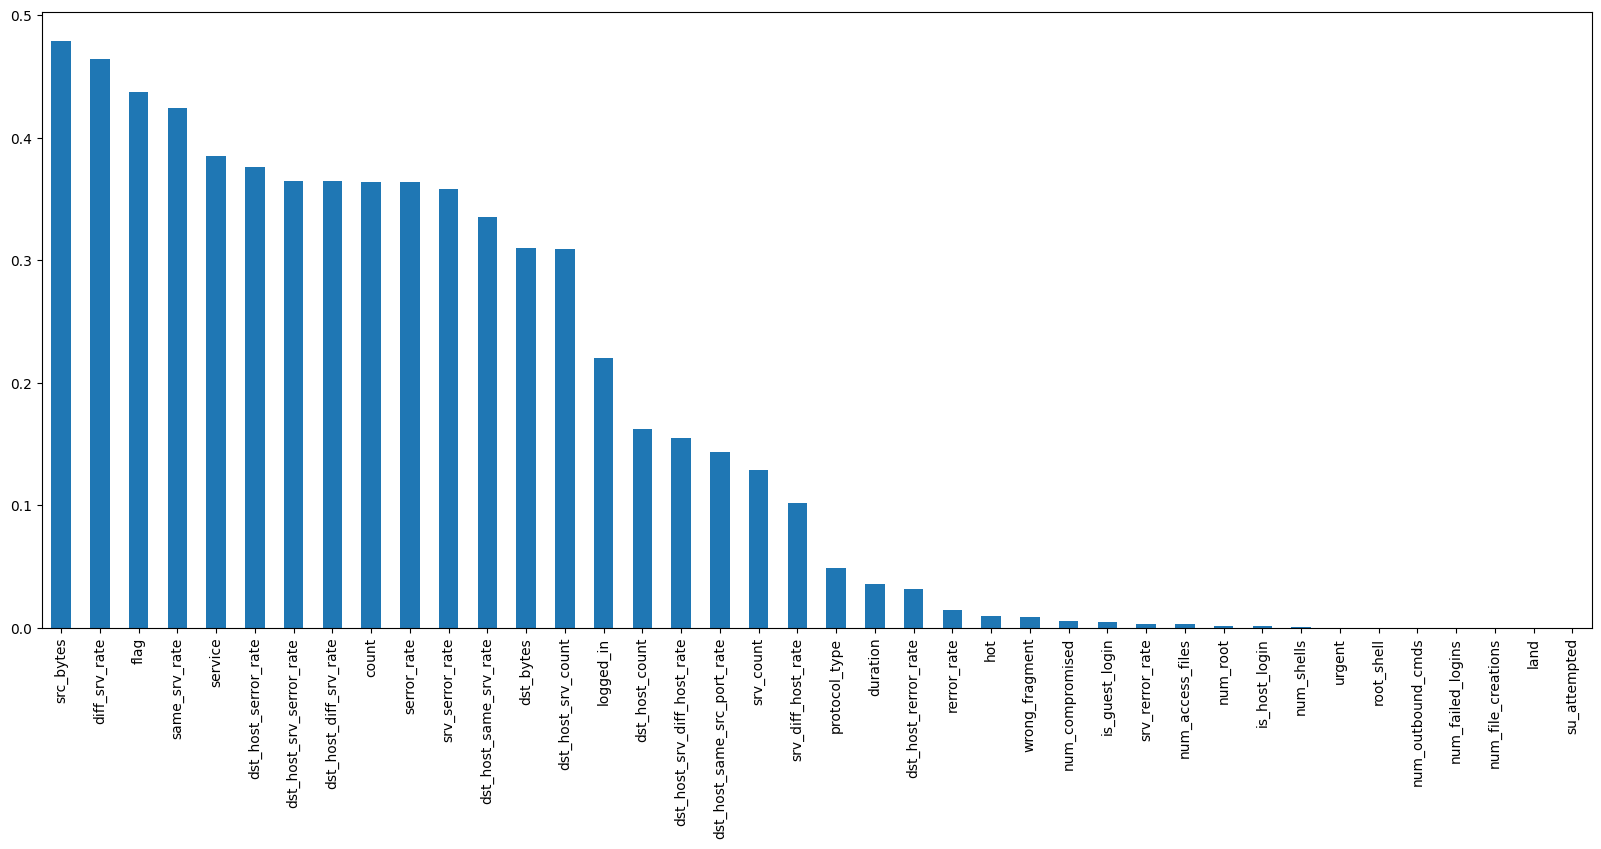

In [53]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=24)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')


### 1\ CFS + DecisionTreeClassifier

Accuracy: 0.8798296588741517 

                Predicted DOS  Predicted Not DOS
Actual DOS              14500                584
Actual Not DOS           2125               5334 

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     15084
         1.0       0.90      0.72      0.80      7459

    accuracy                           0.88     22543
   macro avg       0.89      0.84      0.86     22543
weighted avg       0.88      0.88      0.88     22543



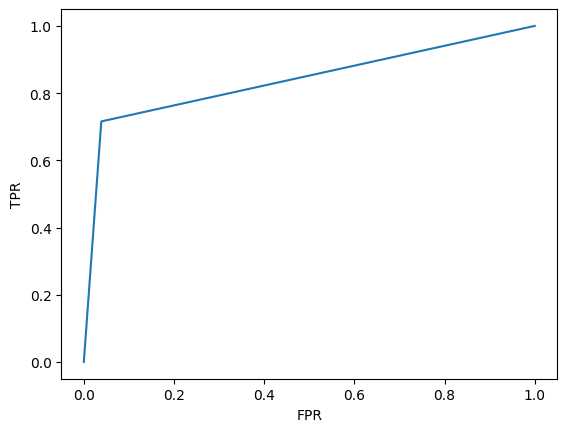

0.8385185607067774


In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### 2\ CFS + RandomForestClassifier

Accuracy: 0.9036064410238211 

                Predicted DOS  Predicted Not DOS
Actual DOS              14901                183
Actual Not DOS           1990               5469 

Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     15084
         1.0       0.97      0.73      0.83      7459

    accuracy                           0.90     22543
   macro avg       0.92      0.86      0.88     22543
weighted avg       0.91      0.90      0.90     22543



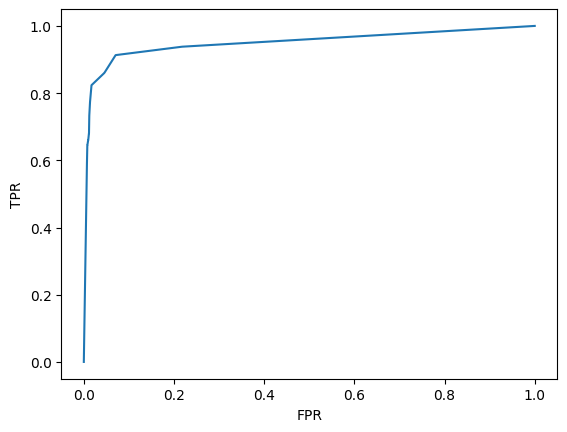

0.9498056048571579


In [57]:

Rf =  RandomForestClassifier(n_estimators =10, criterion='entropy',random_state=88 )
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### 3\ CFS + LogisticRegression

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8949119460586434 

                Predicted DOS  Predicted Not DOS
Actual DOS              14584                500
Actual Not DOS           1869               5590 

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.97      0.92     15084
         1.0       0.92      0.75      0.83      7459

    accuracy                           0.89     22543
   macro avg       0.90      0.86      0.88     22543
weighted avg       0.90      0.89      0.89     22543



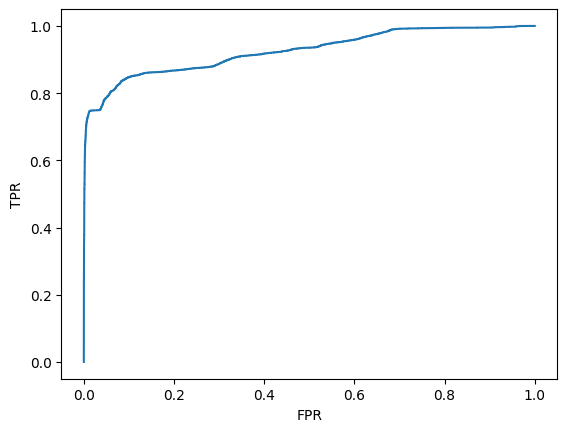

0.925490773587737


In [58]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

## RFE + DecisionTreeClassifier()

Accuracy: 0.9056913454287362 

                Predicted DOS  Predicted Not DOS
Actual DOS              14592                492
Actual Not DOS           1634               5825 

Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     15084
         1.0       0.92      0.78      0.85      7459

    accuracy                           0.91     22543
   macro avg       0.91      0.87      0.89     22543
weighted avg       0.91      0.91      0.90     22543



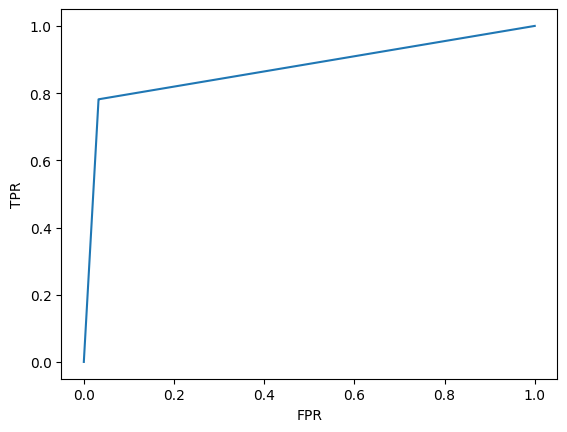

0.8744834530597017


In [59]:
from sklearn.feature_selection import RFE
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=23, step=1)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


## RFE + RandomForestClassifier

Accuracy: 0.9096393558976179 

                Predicted DOS  Predicted Not DOS
Actual DOS              14887                197
Actual Not DOS           1840               5619 

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     15084
         1.0       0.97      0.75      0.85      7459

    accuracy                           0.91     22543
   macro avg       0.93      0.87      0.89     22543
weighted avg       0.92      0.91      0.91     22543



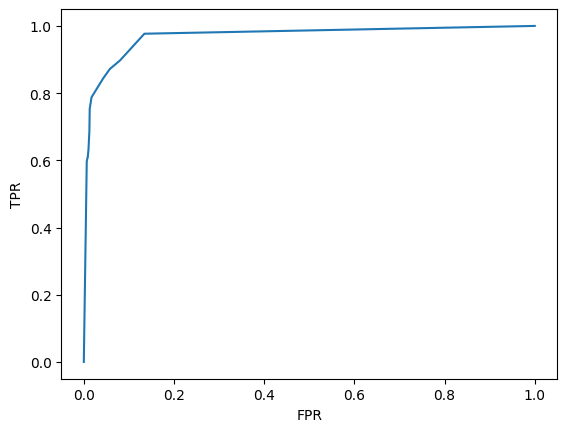

0.9692342224828888


In [60]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators =10, criterion='entropy',random_state=88 )
selector = RFE(estimator, n_features_to_select=23, step=1)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


## RFE + LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=23, step=1)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

## Chi2

In [37]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
selector = SelectKBest(score_func=chi2, k=24)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['duration', 'protocol_type', 'service', 'flag', 'wrong_fragment', 'hot',
       'logged_in', 'is_guest_login', 'count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')


### 1\ Chi2 + DecisionTreeClassifier

Accuracy: 0.9163820254624495 

                Predicted DOS  Predicted Not DOS
Actual DOS              14811                273
Actual Not DOS           1612               5847 

Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     15084
         1.0       0.96      0.78      0.86      7459

    accuracy                           0.92     22543
   macro avg       0.93      0.88      0.90     22543
weighted avg       0.92      0.92      0.91     22543



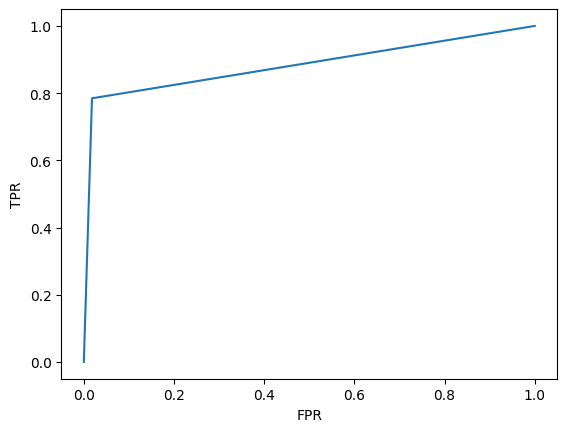

0.883222395395545


In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### 2\ Chi2 + RandomForestClassifier

Accuracy: 0.8651466087033669 

                Predicted DOS  Predicted Not DOS
Actual DOS              14876                208
Actual Not DOS           2832               4627 

Classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     15084
         1.0       0.96      0.62      0.75      7459

    accuracy                           0.87     22543
   macro avg       0.90      0.80      0.83     22543
weighted avg       0.88      0.87      0.86     22543



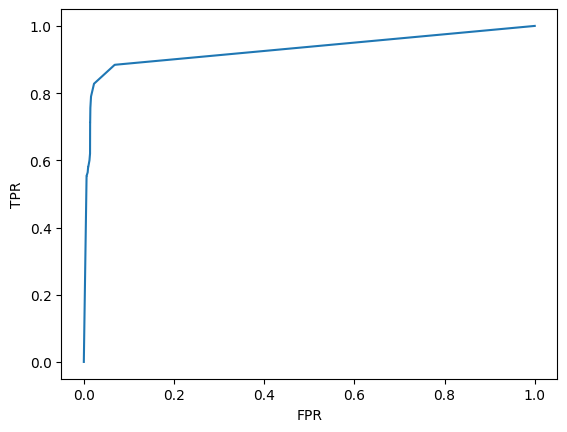

0.9300688144424916


In [39]:
Rf =  RandomForestClassifier(n_estimators =10, criterion='entropy',random_state=88 )
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### 3\ Chi2 + LogisticRegression

Accuracy: 0.9109701459433084 

                Predicted DOS  Predicted Not DOS
Actual DOS              14875                209
Actual Not DOS           1798               5661 

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     15084
         1.0       0.96      0.76      0.85      7459

    accuracy                           0.91     22543
   macro avg       0.93      0.87      0.89     22543
weighted avg       0.92      0.91      0.91     22543



C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


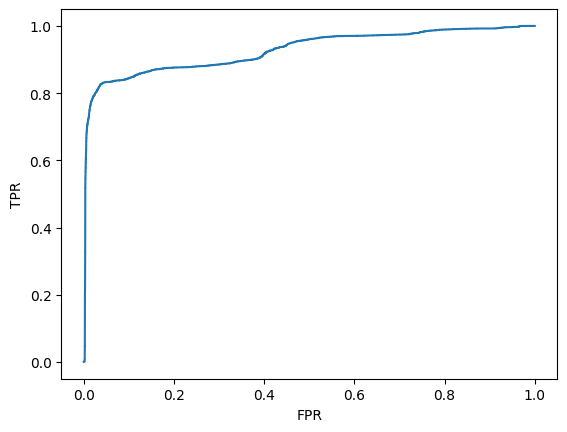

0.9279604132396854


In [40]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)